# New distance function incorporating oscillations

In [9]:
import numpy as np 
import math
import peakutils
import numpy.fft as fft
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
from matplotlib import cm  
from scipy.integrate import odeint 
import scipy.signal as signal 

In [10]:
#gets sumed difderence of arrayData
def getDif(indexes, arrayData):	
    arrLen = len(indexes)
    sum = 0
    for i, ind in enumerate(indexes):
        if i == arrLen - 1:
            break
        sum += arrayData[ind] - arrayData[indexes[i + 1]]
        
    #add last peak - same as substracting it from zero 
    sum += arrayData[indexes[-1:]]  
    return sum   
    
#gets standard deviation 
def getSTD(indexes, arrayData, window):
    numPeaks = len(indexes)
    arrLen = len(arrayData)
    sum = 0
    for ind in indexes:
        minInd = max(0, ind - window)
        maxInd = min(arrLen, ind + window)
        sum += np.std(arrayData[minInd:maxInd])  
        
    sum = sum/numPeaks 	#The 1/P factor
    return sum	 

def getFrequencies(y):
    #fft sample rate: 1 sample per 5 minutes
    y = y[0::self.jump]  #Get y at every jump
    res = abs(fft.rfft(y))  #Real FT
    #normalize the amplitudes 
    res = res/math.ceil(self.nS/2) #nS is N/T, just normalise with this factor
    return res

def costOne(self, Y): #X
    p1 = Y[:,1]   
    fftData = self.getFrequencies(p1)     
    
    diff = fftData - self.idealF         
    cost = -np.dot(diff, diff) 		
    return cost,	
    
def costTwo(Y, getAmplitude = False): #Yes
    p1 = Y[:,1]  #Get the first column
    fftData = self.getFrequencies(p1)    #Get frequencies of FFT of the first column  
    fftData = np.array(fftData) 
    #find peaks using very low threshold and minimum distance
    indexes = peakutils.indexes(fftData, thres=0.02/max(fftData), min_dist=1)  #Just find peaks
    #in case of no oscillations return 0 
    if len(indexes) == 0:     
        return 0,  
    #if amplitude is greater than 400nM
    global amp
    amp = np.max(fftData[indexes])
    if amp > self.maxAmp: #If bigger than 400, then cost is 0, not viable
        return 0, 
    fitSamples = fftData[indexes]  			
    std = self.getSTD(indexes, fftData, 1)  #get sd of peaks at a window of 1 (previous peak)
    diff = self.getDif(indexes, fftData)  #Get differences in peaks
    cost = std + diff #Sum them
    #print(cost)   
    if getAmplitude:
        return cost, amp
    return cost, 
    
def isViableFitness(self, fit):
    return fit >= self.threshold #If above 200, then yes it produces oscillations
    
def isViable(self, point): 
    fitness = self.eval(point, getAmplitude=True)  
    if self.mode == 0: #Mode is determined beforehand...
        return self.isViableFitness(fitness[0]) 
        
    fit = fitness[0] 
    amp = 0
    if fit > 0:
        amp = fitness[1] 
    return self.isViableFitness(fit) and amp >= self.minAmp and amp <= self.maxAmp   
    
#evaluates a candidate  
def eval(self, candidate, getAmplitude = False): 
    Y = np.array(self.simulate(candidate)) #store the simulation and return costs
    if self.mode == 0:
        return self.costOne(Y)  
    else:
        return self.costTwo(Y, getAmplitude)

In [11]:
#Classic eucledian distance
import numpy as np
#Distance function
def euclidean_distance_multiple_trajectories(observed_trajectories, simulated_trajectories):
    num_trajectories = len(observed_trajectories)
    total_distance = 0.0

    for i in range(num_trajectories):
        observed_data = observed_trajectories[i]
        simulated_data = simulated_trajectories[i]

        # Calculate the Euclidean distance between observed and simulated data
        euclidean_distance = np.linalg.norm(observed_data - simulated_data)

        # Accumulate the distances
        total_distance += euclidean_distance

    # Average the distances over all trajectories
    average_distance = total_distance / num_trajectories

    return average_distance

In [12]:
# Only what we need
def getDif(indexes, arrayData):	
    arrLen = len(indexes)
    sum = 0
    for i, ind in enumerate(indexes):
        if i == arrLen - 1:
            break
        sum += arrayData[ind] - arrayData[indexes[i + 1]]
        
    #add last peak - same as substracting it from zero 
    sum += arrayData[indexes[-1:]]  
    return sum   
    
#gets standard deviation 
def getSTD(indexes, arrayData, window):
    numPeaks = len(indexes)
    arrLen = len(arrayData)
    sum = 0
    for ind in indexes:
        minInd = max(0, ind - window)
        maxInd = min(arrLen, ind + window)
        sum += np.std(arrayData[minInd:maxInd])  
        
    sum = sum/numPeaks 	#The 1/P factor
    return sum
    
def getFrequencies(y):
    res = abs(fft.rfft(y))  #Real FT
    #normalize the amplitudes 
    #res = res/math.ceil(1/2) #Normalise with a factor of 1/2
    return res

def costTwo(Y, getAmplitude = False): #Yes
    p1 = Y[:,1]  #Get the first column
    fftData = getFrequencies(p1)    #Get frequencies of FFT of the first column  
    fftData = np.array(fftData) 
    #find peaks using very low threshold and minimum distance
    indexes = peakutils.indexes(fftData, thres=0.02/max(fftData), min_dist=1)  #Just find peaks
    #in case of no oscillations return 0 
    if len(indexes) == 0:     
        return 0
    #if amplitude is greater than 400nM
    #global amp
    #amp = np.max(fftData[indexes])
    #if amp > 400: #If bigger than 400, then cost is 0, not viable
      #  return 0, 
    fitSamples = fftData[indexes]  			
    std = getSTD(indexes, fftData, 1)  #get sd of peaks at a window of 1 (previous peak)
    diff = getDif(indexes, fftData)  #Get differences in peaks
    cost = std + diff #Sum them
    #print(cost)   
    if getAmplitude:
        return cost, amp
    return int(cost)

## To combine them, increase (multiply) euclidean distance by a factor of $\sqrt{|E'|-|E_{cut}|}$ and discard the first 1/3 of the trajectory

In [31]:
def combined_distance(observed_trajectory, simulated_trajectory):
    timepoints = int(len(observed_trajectory))
    third = int(timepoints / 3)
    observed = observed_trajectory[third:timepoints]
    simulated = simulated_trajectory[third:timepoints] #Discard the first third
    euclidean_distance = euclidean_distance_multiple_trajectories(observed, simulated)
    penalising_factor = np.abs(np.abs(costTwo(simulated_trajectory)) - 200)
    if costTwo(simulated_trajectory) >= 200:
        return euclidean_distance
    else:
        if penalising_factor < 1:
            penalising_factor = 1
        return euclidean_distance * penalising_factor

Try it out:

In [32]:
#New model:
def model(variables, t, params):

    m1, p1, m2, p2, m3, p3 = variables
    k1, k2, k3, a1, a2, a3, g1, g2, g3, n1, n2, n3, b1, b2, b3, dm1, dm2, dm3, dp1, dp2, dp3 = params 
    #246.96291990024542
    #24.78485282457379
    #0.024884149937163258
    #5
    #33.82307682700831
    #1.143402097500176
    #0.7833664565550977

    dm1dt = -dm1*m1 + (a1 / (1 + ((1/k1) * p2)**n1)) + g1
    dp1dt = (b1*m1) - (dp1*p1)
    dm2dt = -dm2*m2 + (a2 / (1 + ((1/k2) * p3)**n2)) + g2
    dp2dt = (b2*m2) - (dp2*p2)
    dm3dt = -dm3*m3 + (a3 / (1 + ((1/k3) * p1)**n3)) + g3
    dp3dt = (b3*m3)-(dp3*p3)
    
    return [dm1dt, dp1dt, dm2dt, dp2dt, dm3dt, dp3dt]

close_to_true = np.array([
    246.96291990024542, 246.96291990024542, 246.96291990024542,
    24, 24, 24,
    0, 0, 0,
    5, 5, 5,
    33.82307682700831, 33.82307682700831, 33.82307682700831,
    1, 1, 1,
    0.7833664565550977, 0.7833664565550977, 0.7833664565550977
])

close_no_oscillation = np.array([
    246, 246, 246,
    24, 24, 24,
    0, 0, 0,
    5, 5, 5,
    33, 33, 33,
    1, 1, 1,
    0, 0.7833664565550977, 0
])

true_params = np.array([
    246.96291990024542, 246.96291990024542, 246.96291990024542,
    24.78485282457379, 24.78485282457379, 24.78485282457379,
    0.024884149937163258, 0.024884149937163258, 0.024884149937163258,
    5, 5, 5,
    33.82307682700831, 33.82307682700831, 33.82307682700831,
    1.143402097500176, 1.143402097500176, 1.143402097500176,
    0.7833664565550977, 0.7833664565550977, 0.7833664565550977
])

far_from_true = np.array([
    10, 230, 8,
    -2, 24, 5,
    12, 0, 0,
    -2, 9, 5,
    33, 3, 33,
    1, 16, 1,
    10, 1, 0
])

def solve_ode(params, t):
    initial_conditions = np.array([0, 1, 0, 3, 0, 2])
    solution = odeint(model, initial_conditions, t, args=(params,))
    return solution

num_timesteps = 1000  # Number of time steps for simulation
t = np.linspace(0, 100, num_timesteps)
true_data = solve_ode(true_params, t)
far_data = solve_ode(far_from_true, t)
close_data = solve_ode(close_to_true, t)
close_flat = solve_ode(close_no_oscillation, t)

In [33]:
costTwo(close_flat)

0

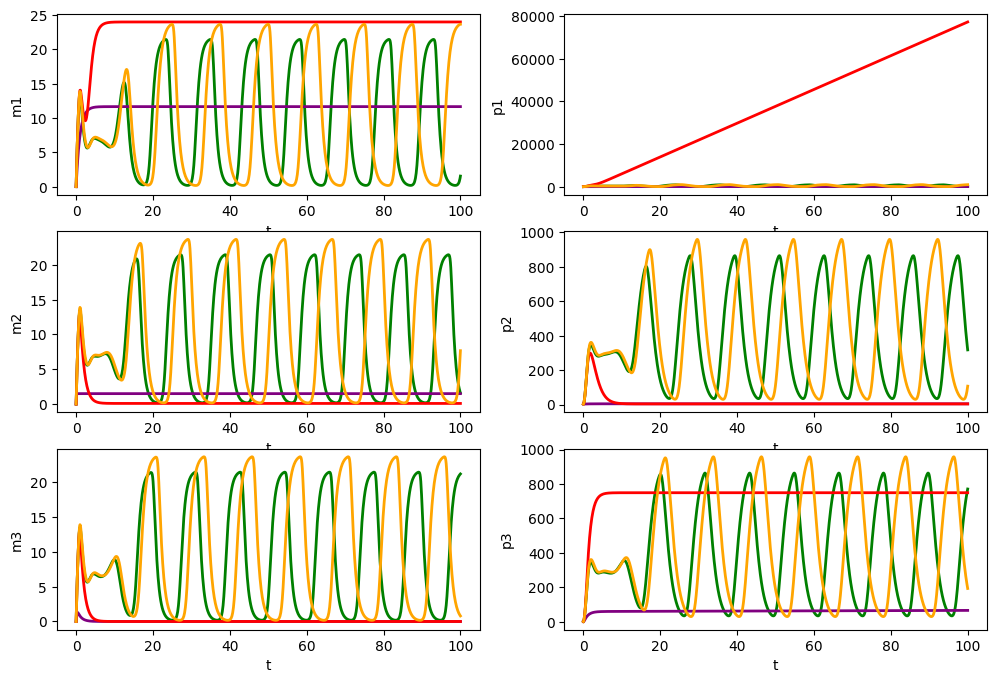

In [16]:
# Plot real trajectories and also accepted trajectories, they overlap
fig, axs = plt.subplots(3, 2, figsize=(12, 8))
axs = axs.flatten()

variable_labels = ['m1', 'p1', 'm2', 'p2', 'm3', 'p3']

for i in range(6):
    axs[i].plot(t, true_data[:, i], label='True Data', linewidth=2, color = "green")
    axs[i].plot(t, far_data[:, i], label='Far Data', linewidth=2, color = "purple")
    axs[i].plot(t, close_flat[:, i], label='Close no oscillation', linewidth=2, color = "red")
    axs[i].plot(t, close_data[:, i], label='Close Data', linewidth=2, color = "orange")
    axs[i].set_xlabel('t')
    axs[i].set_ylabel(variable_labels[i])
    
    #for simulated_data in accepted_data:
       # axs[i].plot(t, simulated_data[:, i], 'k--', alpha=0.1)

plt.show()

# Now what are the distances?

In [34]:
combined_distance(true_data, close_data)


951.6637862339776

In [29]:
true_data[333:1000]

array([[2.03514196e+01, 6.42840321e+02, 2.48254328e-01, 4.31037734e+01,
        4.10425523e+00, 5.20919653e+02],
       [2.04967389e+01, 6.60873240e+02, 2.86354284e-01, 4.07207642e+01,
        3.68088226e+00, 4.94286336e+02],
       [2.06264208e+01, 6.77993067e+02, 3.38759607e-01, 3.86641304e+01,
        3.30105181e+00, 4.68356075e+02],
       ...,
       [9.44322000e-01, 3.46692896e+01, 1.98221468e+00, 3.57992720e+02,
        2.10712585e+01, 7.46843857e+02],
       [1.20635185e+00, 3.55436035e+01, 1.77904851e+00, 3.37106697e+02,
        2.11389228e+01, 7.59246471e+02],
       [1.54252981e+00, 3.73236754e+01, 1.59718204e+00, 3.17170068e+02,
        2.11992418e+01, 7.70921690e+02]])

In [30]:
euclidean_distance_multiple_trajectories(true_data[333:1000], close_data[333:1000])

951.6637862339776

In [27]:
costTwo(close_data)

200706

In [18]:
combined_distance(true_data, close_flat)


4846705.330833152

In [19]:
costTwo(close_flat)

0

In [20]:
combined_distance(true_data, far_data)

163164.61577924484

In [21]:
costTwo(far_data)

0

In [22]:
combined_distance(true_data, true_data)

430.24270305291407

## Old model??

In [23]:
def model2(variables, t, params):
    m1, p1, m2, p2, m3, p3 = variables
    b1, b2 = params

    dm1dt = -m1 + (10 ** 3 / (1 + (10 ** 0 * p2) ** 2)) + 1
    dp1dt = -10 ** b1 * (p1 - m1)

    dm2dt = -m2 + (10 ** 3 / (1 + (10 ** 0 * p3) ** 2)) + 1
    dp2dt = -10 ** b2 * (p2 - m2)

    dm3dt = -m3 + (10 ** 3 / (1 + (10 ** 0 * p1) ** 2)) + 1
    dp3dt = -10 ** 0 * (p3 - m3)

    return [dm1dt, dp1dt, dm2dt, dp2dt, dm3dt, dp3dt]

true_params = np.array([
    0, 0  # first set of odes
])

def solve_ode(params, t):
    initial_conditions = np.array([0, 1, 0, 3, 0, 2])
    solution = odeint(model2, initial_conditions, t, args=(params,))
    return solution

num_timesteps = 1000  # Number of time steps for simulation
t = np.linspace(0, 100, num_timesteps)
true_data_old = solve_ode(true_params, t)

In [24]:
costTwo(true_data_old)

40362